### Imports & Load Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('do not overfit/train.csv', index_col='id')
test_df = pd.read_csv('do not overfit/test.csv', index_col='id')

### EDA

In [3]:
# Info
train_df.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Columns: 301 entries, target to 299
dtypes: float64(301)
memory usage: 589.8 KB


In [5]:
train_df.shape

(250, 301)

- Train dataset with `250 records` and `300 features`

In [6]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19750 entries, 250 to 19999
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 45.4 MB


In [8]:
test_df.shape

(19750, 300)

- Test dataset with `19750 records` and `300 features`

In [9]:
# NaNs
train_df.isnull().sum().sum()

0

In [10]:
test_df.isnull().sum().sum()

0

In [11]:
# # Check High Colinearity
# for col, row in train_df.corr().iterrows():
#     for i in range(train_df.corr().shape[0]):
#         if row[i] > 0.9 and row[i] != 1:
#             print(col)
#             print(row[i])

- There's `no high colinearlity` between any columns to drop.

### Modeling

In [619]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [620]:
x = train_df.drop('target', axis=1)
y = train_df['target']

In [621]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, stratify=y, random_state=0)

##### Logistic Regression

In [623]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=100)

lr_model.fit(x_train, y_train)

train_predict = lr_model.predict(x_train)
valid_predict = lr_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 1.0
Valid Accuracy = 0.72
ROC_AUC score = 0.6112266112266111


- Not Accepted

##### Naive Bayes

In [630]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(var_smoothing = 0.00000000001)

nb_model.fit(x_train, y_train)

train_predict = nb_model.predict(x_train)
valid_predict = nb_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 0.99
Valid Accuracy = 0.62
ROC_AUC score = 0.4189189189189189


- Not Accepted

##### KNN

In [638]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

train_predict = knn_model.predict(x_train)
valid_predict = knn_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 0.76
Valid Accuracy = 0.72
ROC_AUC score = 0.4864864864864865


##### SVM

In [657]:
from sklearn.svm import SVC
svm_model = SVC(kernel='sigmoid')

svm_model.fit(x_train, y_train)

train_predict = svm_model.predict(x_train)
valid_predict = svm_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 0.815
Valid Accuracy = 0.76
ROC_AUC score = 0.5634095634095635


##### Decision Tree

In [662]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=2)

dt_model.fit(x_train, y_train)

train_predict = dt_model.predict(x_train)
valid_predict = dt_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 0.82
Valid Accuracy = 0.8
ROC_AUC score = 0.6153846153846154


##### Random Forest

In [692]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4, max_depth=3, n_jobs=-1, random_state=123)

rf_model.fit(x_train, y_train)

train_predict = rf_model.predict(x_train)
valid_predict = rf_model.predict(x_valid)

print('Train Accuracy = {}'.format(accuracy_score(y_train, train_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid, valid_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid, valid_predict)))

Train Accuracy = 0.795
Valid Accuracy = 0.74
ROC_AUC score = 0.5748440748440748


###### All models, except  logistic regression and naive bayes, doesn't overit but has low score, so, we will try to enhance the score through important features selection

### Features Selection

#### Firstly: Correlation Statistics Methods

In [693]:
import numpy as np
from sklearn import *

In [46]:
# ANOVA method
f_values = feature_selection.f_classif(x,y)[0]

In [53]:
np.nonzero(f_values > 1)

(array([  0,   1,   3,   4,   6,  10,  16,  17,  18,  25,  26,  32,  39,
         46,  54,  55,  57,  59,  63,  66,  69,  73,  74,  76,  79,  80,
         85,  89,  93,  95,  96,  97, 100, 101, 102, 103, 106, 107, 110,
        113, 115, 117, 119, 124, 126, 127, 133, 134, 135, 136, 140, 144,
        145, 151, 158, 159, 160, 162, 163, 167, 169, 175, 176, 177, 178,
        180, 183, 185, 192, 196, 199, 200, 204, 205, 208, 211, 212, 213,
        215, 217, 218, 220, 231, 237, 238, 239, 240, 241, 243, 244, 247,
        250, 251, 253, 260, 261, 262, 264, 271, 272, 278, 281, 286, 288,
        291, 295, 297], dtype=int64),)

In [54]:
np.nonzero(f_values > 2)

(array([  1,   3,   6,  16,  18,  59,  63,  66,  69,  73,  74,  79,  80,
         93,  95,  96, 110, 113, 126, 127, 133, 135, 136, 144, 151, 159,
        160, 162, 167, 169, 175, 176, 177, 178, 183, 192, 196, 199, 200,
        205, 208, 211, 213, 220, 231, 241, 244, 250, 260, 261, 262, 264,
        271, 278, 291], dtype=int64),)

In [59]:
np.nonzero(f_values > 3)

(array([  1,   3,  16,  18,  59,  63,  66,  69,  74,  80,  93,  95, 113,
        126, 127, 133, 135, 136, 151, 159, 167, 175, 176, 177, 192, 199,
        211, 213, 220, 231, 241, 260, 261, 262, 271, 278], dtype=int64),)

- so, we can select features with `f_values more than 3`

In [694]:
selected_features = np.array(np.nonzero(f_values > 3)[0], dtype= str)
selected_features

array(['1', '3', '16', '18', '59', '63', '66', '69', '74', '80', '93',
       '95', '113', '126', '127', '133', '135', '136', '151', '159',
       '167', '175', '176', '177', '192', '199', '211', '213', '220',
       '231', '241', '260', '261', '262', '271', '278'], dtype='<U21')

In [695]:
x1 = train_df[selected_features]
y = train_df['target']
test1 = test_df[selected_features]

#### Modeling

In [697]:
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x1,y, test_size=0.2, stratify=y, random_state=0)

In [711]:
dt_model = DecisionTreeClassifier(max_depth=2)

dt_model.fit(x_train1, y_train1)

train1_predict = dt_model.predict(x_train1)
valid1_predict = dt_model.predict(x_valid1)

print('Train Accuracy = {}'.format(accuracy_score(y_train1, train1_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid1, valid1_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid1, valid1_predict)))

Train Accuracy = 0.81
Valid Accuracy = 0.76
ROC_AUC score = 0.5883575883575884


In [699]:
rf_model = RandomForestClassifier(n_estimators=7, max_depth=3, n_jobs=-1, random_state=123)

rf_model.fit(x_train1, y_train1)

train1_predict = rf_model.predict(x_train1)
valid1_predict = rf_model.predict(x_valid1)

print('Train Accuracy = {}'.format(accuracy_score(y_train1, train1_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid1, valid1_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid1, valid1_predict)))

Train Accuracy = 0.855
Valid Accuracy = 0.8
ROC_AUC score = 0.6403326403326404


- Accpeted as Not Overfit, but still low ROC_AUC score

In [128]:
# mutual information method
mutual_info = feature_selection.mutual_info_classif(x,y, random_state=0)

In [197]:
np.nonzero(mutual_info >= 0.04)[0]

array([ 13,  16,  21,  27,  30,  33,  34,  47,  59,  75,  90,  93, 117,
       126, 127, 133, 147, 164, 169, 179, 213, 220, 240, 272, 274, 297],
      dtype=int64)

In [712]:
selected_features = np.array(np.nonzero(mutual_info >= 0.04)[0], dtype= str)
selected_features

array(['13', '16', '21', '27', '30', '33', '34', '47', '59', '75', '90',
       '93', '117', '126', '127', '133', '147', '164', '169', '179',
       '213', '220', '240', '272', '274', '297'], dtype='<U21')

In [713]:
x2 = train_df[selected_features]
y = train_df['target']
test2 = test_df[selected_features]

#### Modeling

In [715]:
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x2,y, test_size=0.2, stratify=y, random_state=0)

In [721]:
dt_model = DecisionTreeClassifier(max_depth=2)

dt_model.fit(x_train2, y_train2)

train2_predict = dt_model.predict(x_train2)
valid2_predict = dt_model.predict(x_valid2)

print('Train Accuracy = {}'.format(accuracy_score(y_train2, train2_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid2, valid2_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid2, valid2_predict)))

Train Accuracy = 0.795
Valid Accuracy = 0.76
ROC_AUC score = 0.5634095634095635


In [717]:
rf_model = RandomForestClassifier(n_estimators=10, max_depth=3, n_jobs=-1, random_state=123)

rf_model.fit(x_train2, y_train2)

train2_predict = rf_model.predict(x_train2)
valid2_predict = rf_model.predict(x_valid2)

print('Train Accuracy = {}'.format(accuracy_score(y_train2, train2_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid2, valid2_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid2, valid2_predict)))

Train Accuracy = 0.83
Valid Accuracy = 0.78
ROC_AUC score = 0.5769230769230769


- Accpeted as Not Overfit, but still low ROC_AUC score

#### Secondly: Selection Methods

In [755]:
# k_score method
selected_x_with_k_best_classifier = feature_selection.SelectKBest(feature_selection.f_classif, k=15).fit_transform(x, y)

In [756]:
x3 = selected_x_with_k_best_classifier.copy()
y = train_df['target']

#### Modeling

In [757]:
x_train3, x_valid3, y_train3, y_valid3 = train_test_split(x3,y, test_size=0.2, stratify=y, random_state=0)

In [774]:
dt_model = DecisionTreeClassifier(max_depth=2)

dt_model.fit(x_train3, y_train3)

train3_predict = dt_model.predict(x_train3)
valid3_predict = dt_model.predict(x_valid3)

print('Train Accuracy = {}'.format(accuracy_score(y_train3, train3_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid3, valid3_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid3, valid3_predict)))

Train Accuracy = 0.795
Valid Accuracy = 0.8
ROC_AUC score = 0.6153846153846154


In [768]:
rf_model = RandomForestClassifier(n_estimators=6, max_depth=5, n_jobs=-1, random_state=123)

rf_model.fit(x_train3, y_train3)

train3_predict = rf_model.predict(x_train3)
valid3_predict = rf_model.predict(x_valid3)

print('Train Accuracy = {}'.format(accuracy_score(y_train3, train3_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid3, valid3_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid3, valid3_predict)))

Train Accuracy = 0.925
Valid Accuracy = 0.84
ROC_AUC score = 0.6923076923076923


- `Accpeted as Not Overfit & Accpeted ROC_AUC score`

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=6, max_depth=5, n_jobs=-1, random_state=123)

# rf_model.fit(x_train3, y_train3)

# train3_predict = rf_model.predict(x_train3)
# valid3_predict = rf_model.predict(x_valid3)

# print('Train Accuracy = {}'.format(accuracy_score(y_train3, train3_predict)))
# print('Valid Accuracy = {}'.format(accuracy_score(y_valid3, valid3_predict)))
# print('ROC_AUC score = {}'.format(roc_auc_score(y_valid3, valid3_predict)))

In [803]:
# Percentile method
x4 = feature_selection.SelectPercentile(feature_selection.f_classif, percentile=15).fit_transform(x, y)
y = train_df['target']

#### Modeling

In [804]:
x_train4, x_valid4, y_train4, y_valid4 = train_test_split(x4,y, test_size=0.2, stratify=y, random_state=0)

In [836]:
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(x_train4, y_train4)

train4_predict = dt_model.predict(x_train4)
valid4_predict = dt_model.predict(x_valid4)

print('Train Accuracy = {}'.format(accuracy_score(y_train4, train4_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid4, valid4_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid4, valid4_predict)))

Train Accuracy = 0.81
Valid Accuracy = 0.76
ROC_AUC score = 0.5883575883575884


In [826]:
rf_model = RandomForestClassifier(n_estimators=3, max_depth=2, n_jobs=-1, random_state=123)

rf_model.fit(x_train4, y_train4)

train4_predict = rf_model.predict(x_train4)
valid4_predict = rf_model.predict(x_valid4)

print('Train Accuracy = {}'.format(accuracy_score(y_train4, train4_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid4, valid4_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid4, valid4_predict)))

Train Accuracy = 0.78
Valid Accuracy = 0.8
ROC_AUC score = 0.6153846153846154


- Accpeted as Not Overfit, but still low ROC_AUC score

#### Thirdly: Using Feature Importance Property of Model

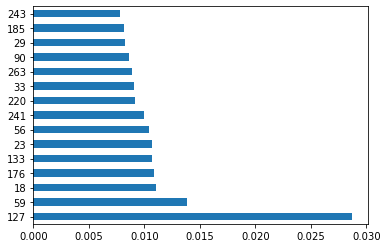

In [786]:
import matplotlib.pyplot as plt  

model = RandomForestClassifier(random_state=123)  
model.fit(x,y)  

#plot graph of feature importances for better visualization  
features_importances = pd.Series(model.feature_importances_, index=x.columns)  
features_importances.nlargest(15).plot(kind='barh')  
plt.show()

In [787]:
selected_features = features_importances.nlargest(15).index
selected_features

Index(['127', '59', '18', '176', '133', '23', '56', '241', '220', '33', '263',
       '90', '29', '185', '243'],
      dtype='object')

In [789]:
x5 = train_df[selected_features]
y = train_df['target']
test5 = test_df[selected_features]

#### Modeling

In [791]:
x_train5, x_valid5, y_train5, y_valid5 = train_test_split(x5,y, test_size=0.2, stratify=y, random_state=0)

In [799]:
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(x_train5, y_train5)

train5_predict = dt_model.predict(x_train5)
valid5_predict = dt_model.predict(x_valid5)

print('Train Accuracy = {}'.format(accuracy_score(y_train5, train5_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid5, valid5_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid5, valid5_predict)))

Train Accuracy = 0.795
Valid Accuracy = 0.8
ROC_AUC score = 0.6153846153846154


In [802]:
rf_model = RandomForestClassifier(n_estimators=6, max_depth=4, n_jobs=-1, random_state=123)

rf_model.fit(x_train5, y_train5)

train5_predict = rf_model.predict(x_train5)
valid5_predict = rf_model.predict(x_valid5)

print('Train Accuracy = {}'.format(accuracy_score(y_train5, train5_predict)))
print('Valid Accuracy = {}'.format(accuracy_score(y_valid5, valid5_predict)))
print('ROC_AUC score = {}'.format(roc_auc_score(y_valid5, valid5_predict)))

Train Accuracy = 0.845
Valid Accuracy = 0.74
ROC_AUC score = 0.524948024948025


#### The best model through using k_score method to select the important features